In [1]:
#CT image reconstruct through the FBP algorithm
#Written by Ren-Qi Pan
import math
import os
from pydicom import dcmread
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [20]:
_pth = r"E:\CMC\pyprojects\radio_therapy\dose-3d\dataset\VMAT 2025 - 6. SIB COMPLEX TARGET\T3\873251693\00826.dcm"

In [21]:
dcm = dcmread(_pth)

In [22]:
images = dcm.pixel_array

In [23]:
images.shape

(1190, 1190)

In [24]:
dcm

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 198
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: RT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.246.352.99.4.5222385589064362484.17991744027939631527
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.70.2
(0002,0013) Implementation Version Name         SH: 'MergeCOM3_460'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'PORTAL']
(0008,0012) Instance Creation Date              DA: '20250607'
(0008,0013) Instance Creation Time              TM: '154938'
(0008,0016) SOP Class UID                       UI: RT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.246.352.99.4.5222385589064362484.17991744027

In [7]:
np.max(images[60])

1114393

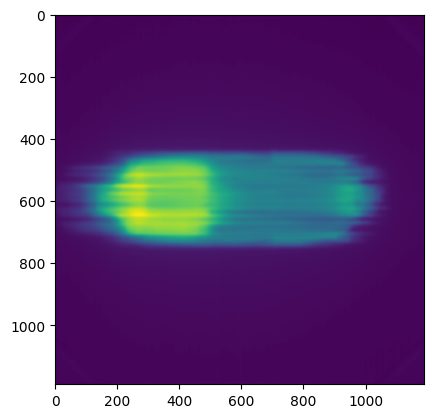

In [26]:
plt.imshow(images)

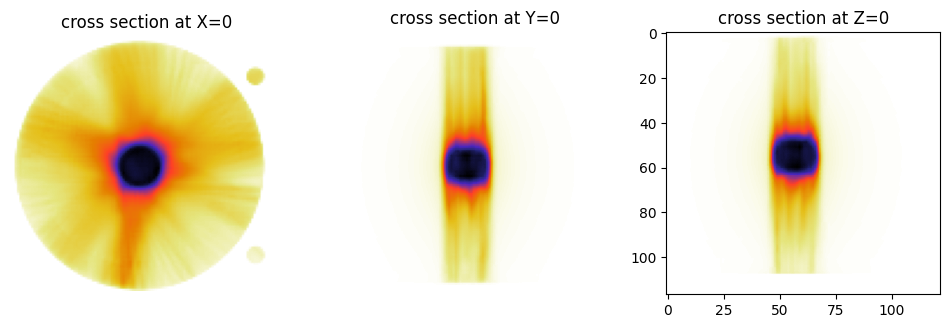

In [9]:
Nimage = images.shape[0]
NimageZ=Nimage*images.shape[0]/images.shape[0]
Z_c=int(NimageZ/2.0)
X_c=int(Nimage/2.0)
Y_c=int(Nimage/2.0)
figure, axis=plt.subplots(1, 3,figsize=(12,12))
axis[0].imshow(images[X_c,:,:].T, cmap='CMRmap_r')
axis[0].set_title('cross section at X=0')
axis[0].axis('off')
axis[1].imshow(images[:,Y_c,:].T, cmap='CMRmap_r')
axis[1].set_title('cross section at Y=0')
axis[1].axis('off')
axis[2].imshow(images[:,:,Z_c].T, cmap='CMRmap_r')
axis[2].set_title('cross section at Z=0')
# axis[2].axis('off')
# plt.savefig(directory+"rec_image.pdf",format='pdf',dpi=250)
# plt.title('TPS dose')
figure.align_titles()
plt.show()